# Project 5

- Airline 데이터
- 다양한 알고리즘으로 모델 만들고 성능 예측 -> 모델 튜닝

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# data 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/airline_satisfaction_small.csv'
data = pd.read_csv(path)

In [3]:
# 데이터 확인
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [4]:
# 기초통계량 확인
data.describe()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2574.000000,2580.000000
mean,65179.742248,39.229845,1204.824806,2.732558,3.041473,2.758527,2.973256,3.229457,3.242248,3.440310,3.329070,3.361628,3.298450,3.599225,3.318992,3.620155,3.277907,14.856202,15.285159,0.427132
std,37320.994433,15.295065,1008.852185,1.317032,1.542290,1.400792,1.271752,1.341635,1.341842,1.329681,1.334021,1.266627,1.313897,1.168210,1.256309,1.182093,1.317367,35.808534,36.301790,0.494758
min,54.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32988.750000,26.000000,405.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64877.000000,40.000000,860.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97717.000000,51.000000,1754.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,13.000000,14.000000,1.000000
max,129860.000000,85.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,435.000000,470.000000,1.000000


**데이터 설명**

- id : 탑승자 고유 아이디
- gender: 성별 (Female, Male)
- customer_type: 고객 유형 (Loyal customer, disloyal customer)
- age: 탑승자 나이
- type_of_travel: 비행 목적(Personal Travel, Business Travel)
- class: 등급 (Business, Eco, Eco Plus)
- flight_distance: 비행 거리
- inflight_wifi_service: 와이파이 서비스 만족도 (0:N/A; 1-5)
- departure/arrival_time_convenient: 출발, 도착 시간 만족도 (0:N/A; 1-5)
- ease_of_online_booking: 온라인 부킹 만족도 (0:N/A; 1-5)
- gate_location: 게이트 위치 만족도 (0:N/A; 1-5)
- food_and_drink: 식사와 음료 만족도 (0:N/A; 1-5)
- online_boarding: 온라인 보딩 만족도 (0:N/A; 1-5)
- seat_comfort: 좌석 편안함 만족도 (0:N/A; 1-5)
- inflight_entertainment: 기내 엔터테인먼트 만족도 (0:N/A; 1-5)
- on-board_service: 온 보드 서비스 만족도 (0:N/A; 1-5)
- leg_room_service: 다리 공간 만족도 (0:N/A; 1-5)
- baggage_handling: 수하물 처리 만족도 (0:N/A; 1-5)
- check-in_service: 체크인 서비스 만족도 (0:N/A; 1-5)
- inflight_service: 기내 서비스 만족도 (0:N/A; 1-5)
- cleanliness: 청결 만족도 (0:N/A; 1-5)
- departure_delay_in_minutes: 출발 지연 시간(분)
- arrival_delay_in_minutes: 도착 지연 시간(분)
- satisfaction: 항공 만족도(1: Satisfaction, 0: Neutral or Dissatisfaction) - Target

In [5]:
# 변수 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2580 non-null   int64  
 1   gender                             2580 non-null   object 
 2   customer_type                      2580 non-null   object 
 3   age                                2580 non-null   int64  
 4   type_of_travel                     2580 non-null   object 
 5   class                              2580 non-null   object 
 6   flight_distance                    2580 non-null   int64  
 7   inflight_wifi_service              2580 non-null   int64  
 8   departure/arrival_time_convenient  2580 non-null   int64  
 9   ease_of_online_booking             2580 non-null   int64  
 10  gate_location                      2580 non-null   int64  
 11  food_and_drink                     2580 non-null   int64

In [6]:
# 변수 제거 : id, departure/arrival_time_convenient, gate_location, departure_delay_in_minutes
drop_cols = ['id', 'departure/arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes']
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1


In [7]:
# 결측치 제거
data.isnull().sum()

gender                      0
customer_type               0
age                         0
type_of_travel              0
class                       0
flight_distance             0
inflight_wifi_service       0
ease_of_online_booking      0
food_and_drink              0
online_boarding             0
seat_comfort                0
inflight_entertainment      0
on-board_service            0
leg_room_service            0
baggage_handling            0
checkin_service             0
inflight_service            0
cleanliness                 0
arrival_delay_in_minutes    6
satisfaction                0
dtype: int64

In [8]:
# 제거
data.dropna(inplace=True)

# 확인
data.isnull().sum()

gender                      0
customer_type               0
age                         0
type_of_travel              0
class                       0
flight_distance             0
inflight_wifi_service       0
ease_of_online_booking      0
food_and_drink              0
online_boarding             0
seat_comfort                0
inflight_entertainment      0
on-board_service            0
leg_room_service            0
baggage_handling            0
checkin_service             0
inflight_service            0
cleanliness                 0
arrival_delay_in_minutes    0
satisfaction                0
dtype: int64

In [9]:
# x, y 분리
target = 'satisfaction'

x = data.drop(target, axis=1)
y = data.loc[:, target]

In [10]:
# 가변수화 : gender, customer_type, type_of_travel, class
dumm_cols = ['gender', 'customer_type', 'type_of_travel', 'class']
x = pd.get_dummies(data=x, columns=dumm_cols, drop_first=True)
x.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,18.0,1,0,1,0,1
1,25,235,3,3,1,3,1,1,1,5,3,1,4,1,6.0,1,1,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0
3,25,562,2,5,2,2,2,2,2,5,3,1,4,2,9.0,0,0,0,0,0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0


In [11]:
# train, test 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [12]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [13]:
# 필요 함수 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [14]:
# 결과 저장할 변수 생성
result = {}

In [15]:
# KNN
model = KNeighborsClassifier(n_neighbors=5)
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['KNN'] = cv_score.mean()
result

[0.65927978 0.63333333 0.60833333 0.625      0.61666667]
평균: 0.6285226223453371
표준편차: 0.017491286587467715


{'KNN': 0.6285226223453371}

In [16]:
# Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=1)
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['Decision Tree'] = cv_score.mean()
result

[0.89196676 0.89166667 0.90277778 0.90277778 0.87777778]
평균: 0.893393351800554
표준편차: 0.009219519103153542


{'KNN': 0.6285226223453371, 'Decision Tree': 0.893393351800554}

In [18]:
# Logistic Regression
model = LogisticRegression()
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['Logistic Regression'] = cv_score.mean()
result

[0.82825485 0.84444444 0.825      0.80555556 0.825     ]
평균: 0.8256509695290859
표준편차: 0.012366471332293117


{'KNN': 0.6285226223453371,
 'Decision Tree': 0.893393351800554,
 'Logistic Regression': 0.8256509695290859}

In [19]:
# Random Forest
model = RandomForestClassifier(max_depth=5, random_state=1)
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['Random Forest'] = cv_score.mean()
result

[0.91135734 0.90277778 0.92222222 0.89444444 0.93333333]
평균: 0.9128270236995999
표준편차: 0.013782924376221743


{'KNN': 0.6285226223453371,
 'Decision Tree': 0.893393351800554,
 'Logistic Regression': 0.8256509695290859,
 'Random Forest': 0.9128270236995999}

In [20]:
# XGBoost
model = XGBClassifier(max_depth=5, random_state=1)
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['XGBoost'] = cv_score.mean()
result

[0.93351801 0.92222222 0.925      0.93888889 0.94722222]
평균: 0.9333702677746999
표준편차: 0.009129008157799455


{'KNN': 0.6285226223453371,
 'Decision Tree': 0.893393351800554,
 'Logistic Regression': 0.8256509695290859,
 'Random Forest': 0.9128270236995999,
 'XGBoost': 0.9333702677746999}

In [21]:
# LightGBM
model = LGBMClassifier(max_depth=5, random_state=1)
cv_score = cross_val_score(model, x_train, y_train)

print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

result['LightGBM'] = cv_score.mean()
result

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 608, number of negative: 832
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 493
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.422222 -> initscore=-0.313658
[LightGBM] [Info] Start training from score -0.313658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

{'KNN': 0.6285226223453371,
 'Decision Tree': 0.893393351800554,
 'Logistic Regression': 0.8256509695290859,
 'Random Forest': 0.9128270236995999,
 'XGBoost': 0.9333702677746999,
 'LightGBM': 0.9328147122191444}

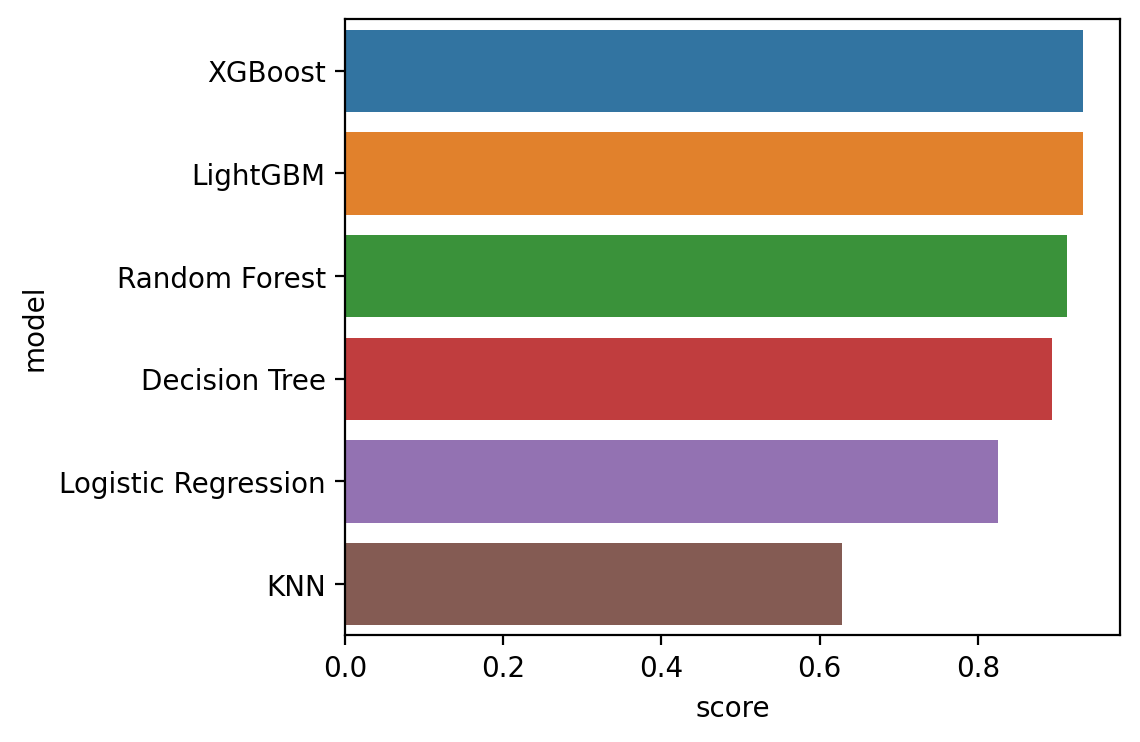

In [22]:
# 모델 성능 시각화
perf_dic = {'model': result.keys(), 'score': result.values()}
df = pd.DataFrame(perf_dic)
df.sort_values(by='score', ascending=False, inplace=True)

plt.figure(figsize=(5, 4))
sns.barplot(x=df['score'], y=df['model'])
plt.show()

In [23]:
# 성능 튜닝
model_dt = XGBClassifier(random_state=1)

# 파라미터
param = {'max_depth': range(1, 21)}

model = GridSearchCV(model_dt,
                     param,
                     cv=5,
                     scoring='accuracy')

In [24]:
model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

In [26]:
# 결과 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print(model.best_params_)
print('-' * 80)
print(model.best_score_)
print('=' * 80)

[0.9261542  0.92393352 0.93281779 0.93059711 0.93337027 0.93281163
 0.93336719 0.93114805 0.93448138 0.93503386 0.93670052 0.9328101
 0.93225608 0.93725454 0.9344783  0.93503386 0.93503386 0.93503386
 0.93503386 0.93503386]
--------------------------------------------------------------------------------
{'max_depth': 14}
--------------------------------------------------------------------------------
0.9372545398584181


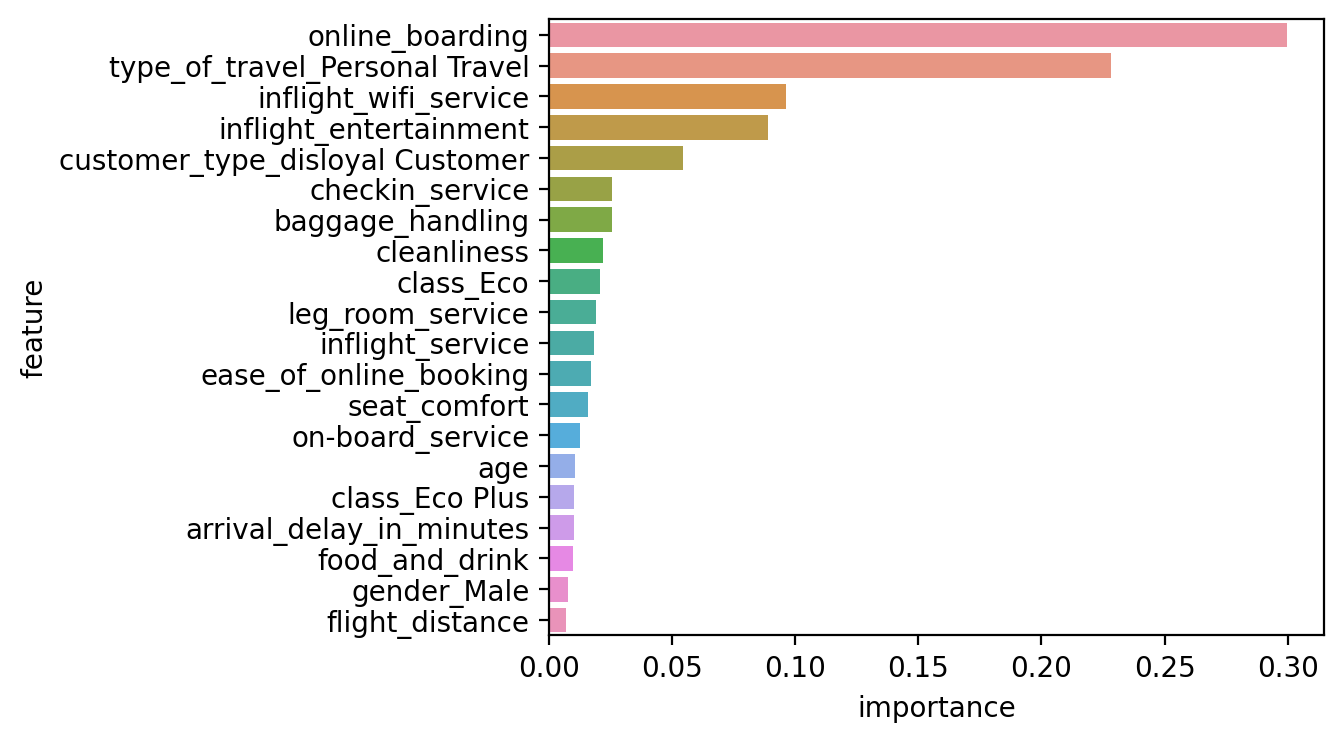

In [27]:
# feature importance 시각화
perf_dic = {'feature': list(x), 'importance': model.best_estimator_.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(5, 4))
sns.barplot(x=df['importance'], y=df['feature'])
plt.show()

In [28]:
# 성능 평가
y_pred = model.predict(x_test)

In [29]:
# 평가
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       449
           1       0.91      0.95      0.93       324

    accuracy                           0.94       773
   macro avg       0.94      0.94      0.94       773
weighted avg       0.94      0.94      0.94       773

